<a id='1'></a>
<div class="alert alert-block alert-danger">
<h2>1 Import Packages</h2>
</div>

In [26]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # ignore information messages

import tensorflow as tf
from tensorflow.keras.datasets import mnist
# natural images of 10 different classes with 50000 training and 10000 test grayscale 32x32 pixels RGB images
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu

from tensorflow.keras.regularizers import l2   # to avoid overfitting

<div>
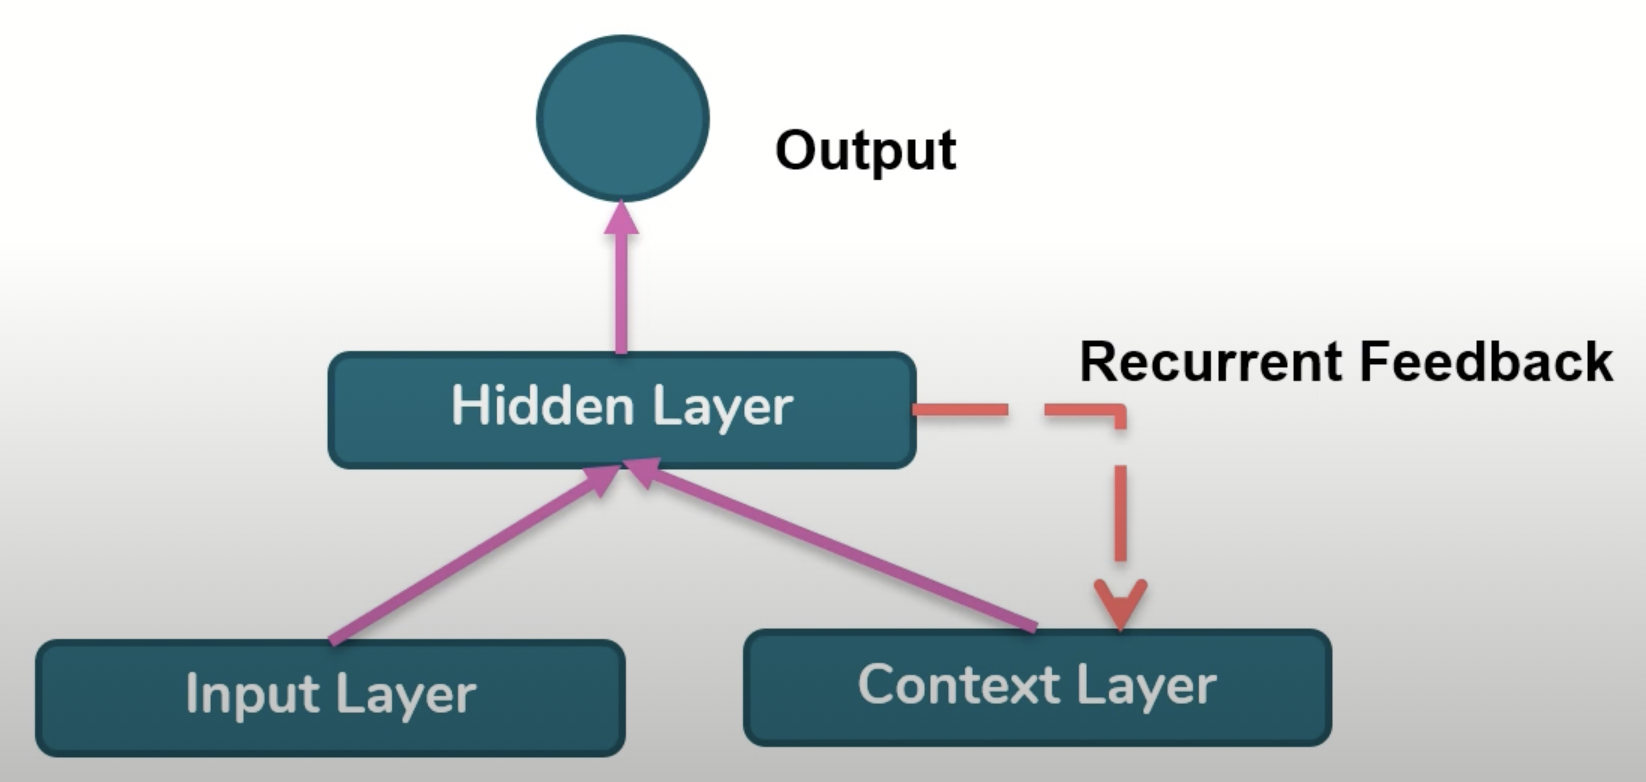
</div>

- Recurrent neural networks (RNN) are a class of neural networks that is powerful for modeling sequence data such as time series or natural language.

<a id='2'></a>
<div class="alert alert-block alert-danger">
   <h2>
    2 Load Dataset
    </h2>
</div>

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [4]:
X_train.shape

(60000, 28, 28)

<a id='3'></a>
<div class="alert alert-block alert-danger">
   <h2>
    3 Create a neural network
    </h2>
</div>

<a id='31'></a>
<div class="alert alert-block alert-info">
   <h3>
        3.1 SimpleRNN
   </h3>
</div>

In [5]:
model = Sequential()
model.add(InputLayer(input_shape=(None, 28)))
=model.add(SimpleRNN(512, return_sequences=True, activation='relu'))
model.add(SimpleRNN(512, activation='relu'))
model.add(Dense(10))

Metal device set to: Apple M1


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 512)         276992    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 512)               524800    
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 806,922
Trainable params: 806,922
Non-trainable params: 0
_________________________________________________________________


simple_rnn (SimpleRNN)  -> (None, None, 512) -> return_sequences=True

In [8]:
# specify the training configuration (optimizer, loss, metrics)
model.compile(optimizer=Adam(lr=0.001),   # learning rate
             loss=SparseCategoricalCrossentropy(from_logits=True),
              # from_logits=True -> Dense(10, activation='softmax')
             metrics=['accuracy'])

In [10]:
%%time
# train the model by slicing the data into "batches" of size batch_size, and repeatedly iterating 
# over the entire dataset for a given number of epochs.
model.fit(X_train, y_train, batch_size=64, epochs=3)
model.evaluate(X_test, y_test, batch_size=64)

Epoch 1/3
938/938 [==============================] - 615s 655ms/step - loss: 0.2281 - accuracy: 0.9360
Epoch 2/3
938/938 [==============================] - 621s 662ms/step - loss: 0.1427 - accuracy: 0.9608
Epoch 3/3
157/157 [==============================] - 12s 74ms/step - loss: 0.1346 - accuracy: 0.9638
CPU times: user 33min 27s, sys: 1h 1min 6s, total: 1h 34min 34s
Wall time: 31min 5s


[0.13455496728420258, 0.9638000726699829]

<div>
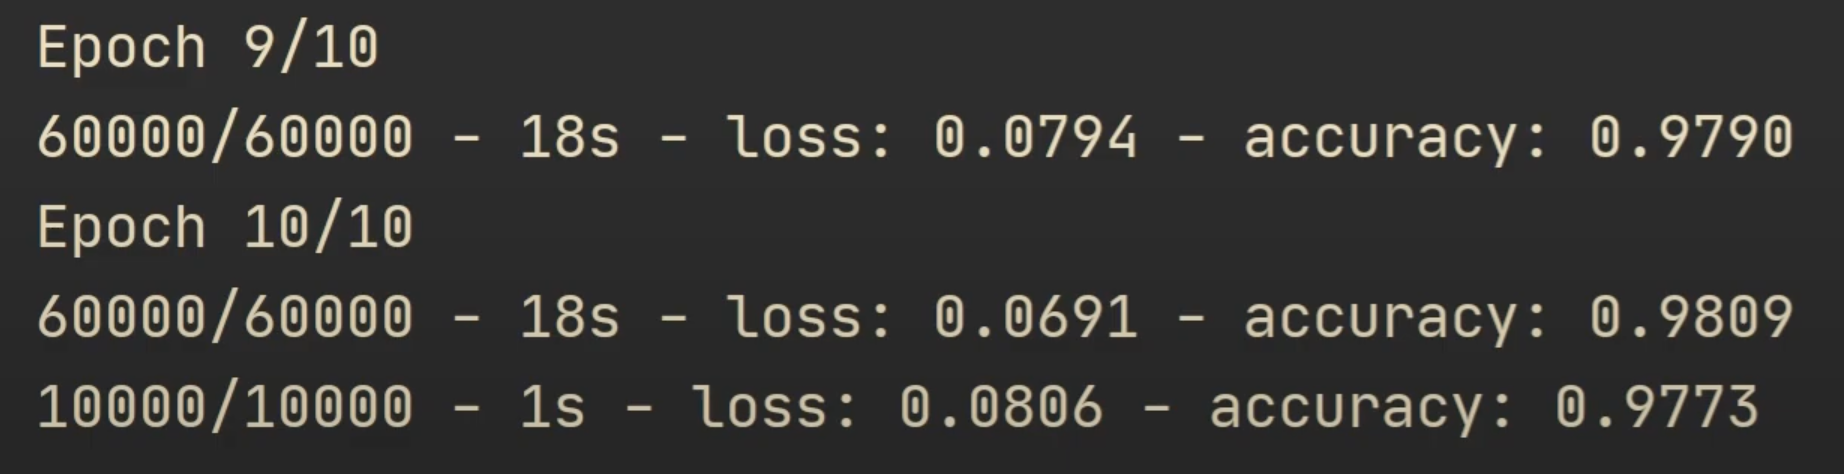
</div>

<a id='31'></a>
<div class="alert alert-block alert-info">
   <h3>
        3.1 GRU
   </h3>
</div>

In [12]:
model = Sequential()
model.add(InputLayer(input_shape=(None, 28)))
model.add(GRU(256, return_sequences=True, activation='relu'))
model.add(GRU(256, activation='relu'))
model.add(Dense(10))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 256)         219648    
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 616,970
Trainable params: 616,970
Non-trainable params: 0
_________________________________________________________________


In [16]:
# specify the training configuration (optimizer, loss, metrics)
model.compile(optimizer=Adam(lr=0.001),   # learning rate
             loss=SparseCategoricalCrossentropy(from_logits=True),
              # from_logits=True -> Dense(10, activation='softmax')
             metrics=['accuracy'])

In [23]:
%%time
# train the model by slicing the data into "batches" of size batch_size, and repeatedly iterating 
# over the entire dataset for a given number of epochs.
model.fit(X_train, y_train, batch_size=64, epochs=1)
model.evaluate(X_test, y_test, batch_size=64)

CPU times: user 3 µs, sys: 9 µs, total: 12 µs
Wall time: 16.2 µs


<div>
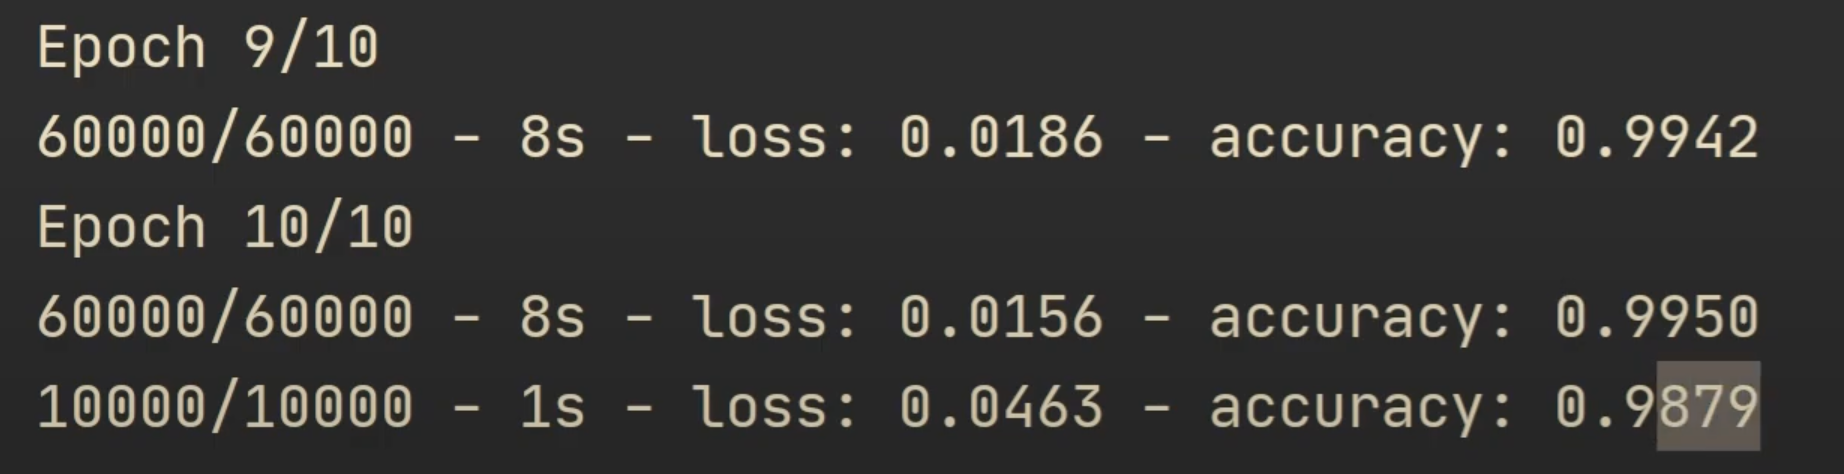
</div>

<a id='31'></a>
<div class="alert alert-block alert-info">
   <h3>
        3.1 LSTM
   </h3>
</div>

In [27]:
model = Sequential()
model.add(InputLayer(input_shape=(None, 28)))
model.add(Bidirectional(LSTM(256, return_sequences=True, activation='relu')))   # Bidirectional
model.add(Bidirectional(LSTM(256, activation='relu')))
model.add(Dense(10))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, None, 512)         583680    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 2,163,722
Trainable params: 2,163,722
Non-trainable params: 0
_________________________________________________________________


In [29]:
# specify the training configuration (optimizer, loss, metrics)
model.compile(optimizer=Adam(lr=0.001),   # learning rate
             loss=SparseCategoricalCrossentropy(from_logits=True),
              # from_logits=True -> Dense(10, activation='softmax')
             metrics=['accuracy'])

In [24]:
%%time
# train the model by slicing the data into "batches" of size batch_size, and repeatedly iterating 
# over the entire dataset for a given number of epochs.
model.fit(X_train, y_train, batch_size=64, epochs=1)
model.evaluate(X_test, y_test, batch_size=64)

CPU times: user 6 µs, sys: 15 µs, total: 21 µs
Wall time: 28.4 µs


<div>
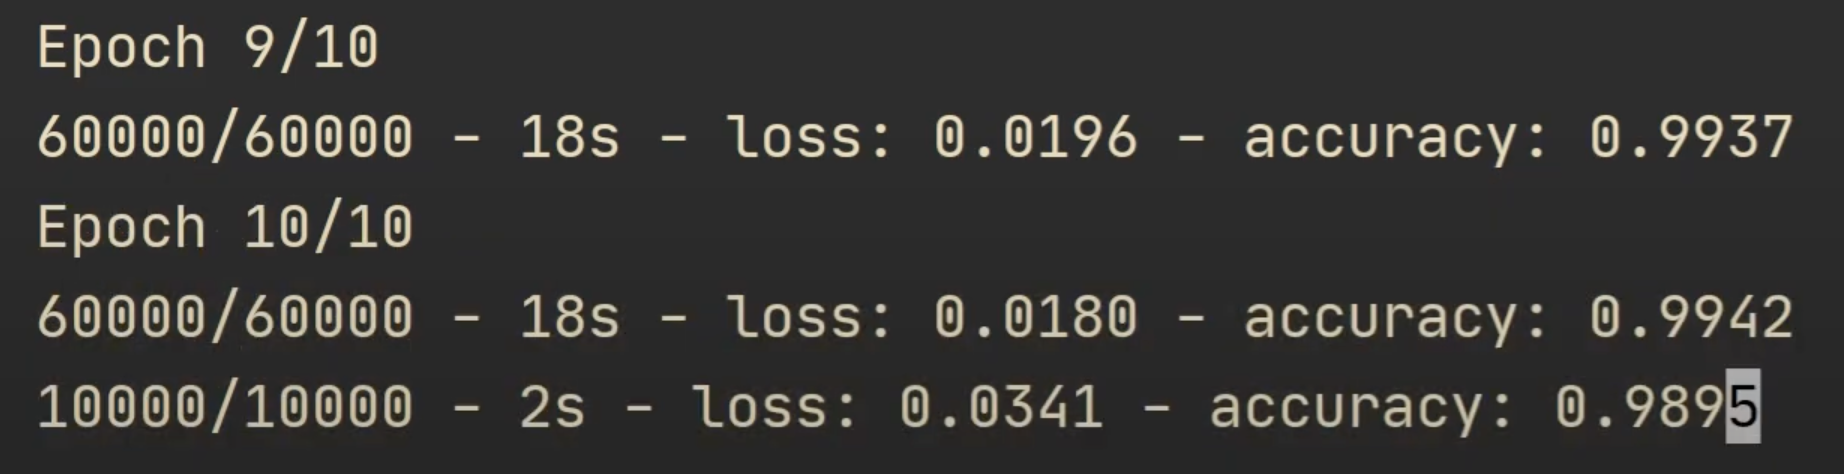
</div>